<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Raices/Raices_Biseccion_PuntoFijo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt

# Raíces númericas

---

### Profesor: Juan Marcos Marín

---


En diferentes contextos y problemas de la física y astronomía no es posible encontrar la solución exacta a ecuaciones del tipo

$$f(x) = 0$$

Por ejemplo, ecuaciones no lineales complejas o sistemas de ecuaciones que involucran múltiples variables pueden ser intratables por métodos algebraicos convencionales. Es por esto necesario comprender los métodos númericos que nos pueden ayudar a hallar las diferentes raices para funciones.



## Método gráfico

Consideremos la función cuadrática:

$$
f(x) = x^2 - 4
$$

* Paso 1: Graficar la función

Si graficamos la función $f(x) = x^2 - 4$, obtenemos una parábola que se abre hacia arriba, con su vértice en $(0, -4)$.

* Paso 2: Identificar visualmente las raíces

Las raíces de la función se encuentran en los puntos donde la gráfica corta el eje $x$. Para esta función, podemos ver que la gráfica cruza el eje $x$ en dos puntos:

$$
x = -2 \quad \text{y} \quad x = 2
$$

* Paso 3: Confirmar las raíces

Podemos confirmar que estos puntos son efectivamente las raíces resolviendo la ecuación $x^2 - 4 = 0$

$$
x^2 = 4 \quad \Rightarrow \quad x = \pm 2
$$

Así, las raíces de la función son $x = -2$ y $x = 2$, lo que coincide con los puntos donde la gráfica corta el eje $x$.

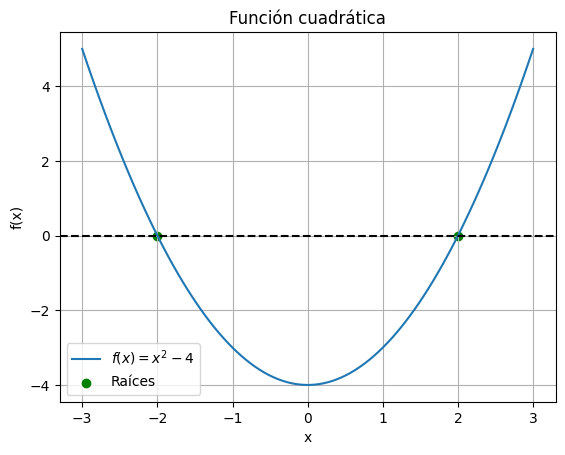

In [ ]:
x = np.linspace(-3, 3, 100)
y = x**2 - 4

plt.plot(x, y, label='$f(x) = x^2 - 4$')
plt.axhline(0, color='black', linestyle='--')
plt.scatter([-2, 2], [0, 0], color='green', label='Raíces')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función cuadrática')
plt.grid(True)
plt.show()

### Ejemplo
Encontremos las raices para la ecuación

$$3\sin(x) + 9 = x^2 - \cos(x)$$

Los puntos donde las funciones se encuentran serán las denominadas raíces. Tomemos:

$$f_1(x) = 3\sin(x) + 9 $$

$$f_2(x) = x^2 - \cos(x)$$

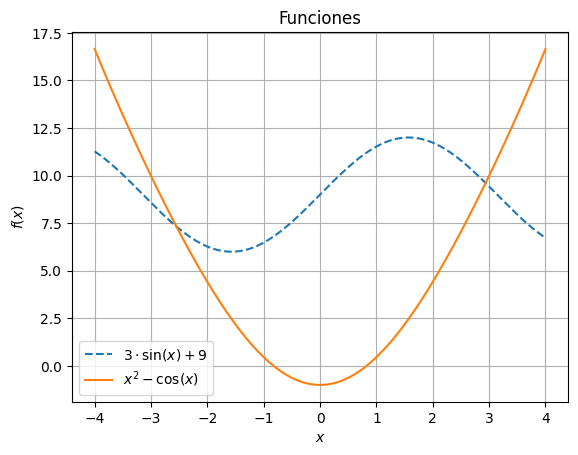

In [ ]:
x = np.linspace(-4, 4, 100000)
f1 = lambda x: 3*np.sin(x) + 9
f2 = lambda x: x**2 - np.cos(x)

plt.plot(x, f1(x), '--', label='$3\cdot\sin(x) + 9$')
plt.plot(x, f2(x), label='$x^2 - \cos(x)$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Funciones')
plt.grid(True)
plt.show()

Analicemos la diferencia entre las funciones para tratar de encontrar cuando son cercanos a cero $f_1(x) - f_2(x) \approx 0$ esto es:

$$\left(3\sin(x) + 9\right) - \left(x^2 - \cos(x)\right) = 0$$

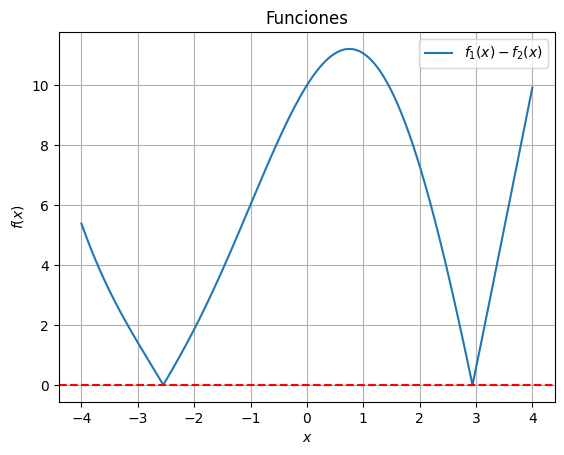

In [ ]:
dif = f1(x) - f2(x)
plt.plot(x, abs(dif), label='$f_1(x) - f_2(x)$')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Funciones')
plt.grid(True)

In [ ]:
# Restar las funciones
diferencia = np.abs(f1(x) - f2(x))

tol = 0.0002
indices = np.where(diferencia < tol)

# Obtener los valores de x correspondientes
x_vals = x[indices]

# Mostrar los resultados
print("Los valores de x donde f1(x) y f2(x) son cercanas son:", x_vals)

# Evaluacion
res = abs(f1(x_vals) - f2(x_vals))
print(f'La evaluación de la raiz será igual a {res}')

minimo = np.argmin(abs(f1(x) - f2(x)))
print(f'La raiz será {x[minimo]}')

Los valores de x donde f1(x) y f2(x) son cercanas son: [-2.54822548  2.93750938]
La evaluación de la raiz será igual a [1.69324757e-05 1.99871552e-04]
La raiz será -2.5482254822548223


## Teorema del Valor Medio

Sea $f$ una función que satisface las siguientes condiciones:

1. $f$ es continua en el intervalo cerrado $[a,b]$
2. $f$ es derivable en el intervalo abierto $(a,b)$

Entonces existe al menos un punto $c$ en el intervalo $(a,b)$ tal que:

$$ f'(c) = \frac{f(b) - f(a)}{b - a} $$


El teorema del valor medio establece que existe al menos un punto en la curva de $f$ donde la tangente es paralela a la línea secante que une los puntos $(a,f(a))$ y $(b,f(b))$.





## Método de la Bisección



El **Método de la Bisección** es un método numérico utilizado para encontrar raíces de funciones continuas. Se basa en el Teorema del Valor Intermedio, que establece que si una función es continua en un intervalo cerrado $[a, b]$ y cambia de signo, entonces existe al menos una raíz en ese intervalo.

![Biseccion](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Bisection_method.svg/800px-Bisection_method.svg.png)

### Pasos del Método de la Bisección

1. **Definir la función** $f(x)$ que queremos analizar y el intervalo $[a, b]$ tal que:
   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).

2. **Calcular el punto medio**:
   $$
   c = \frac{a + b}{2}
   $$

3. **Evaluar la función en el punto medio**:
   - Si $f(c) = 0$, entonces $c$ es la raíz.
   - Si $f(c) \cdot f(a) < 0$, entonces la raíz se encuentra en el intervalo $[a, c]$. Actualizar $b = c$.
   - Si $f(c) \cdot f(b) < 0$, entonces la raíz se encuentra en el intervalo $[c, b]$. Actualizar $a = c$.

4. **Repetir** los pasos 2 y 3 hasta que la precisión deseada sea alcanzada:
   $$
   f(c) < \epsilon
   $$
   donde $\epsilon$ es un valor pequeño que determina la precisión.

### Ejemplo

Consideremos la función $f(x) = x^2 - 4$ y busquemos la raíz en el intervalo $[0, 3]$:

1. $f(0) = -4$ y $f(3) = 5$ (cambio de signo).
2. Calcular $c$:
   $$
   c = \frac{0 + 3}{2} = 1.5
   $$
   $f(1.5) = 1.25$ (signo positivo).
3. Actualizar intervalo: $[0, 1.5]$.
4. Repetir hasta que $f(c)$ sea menor que $\epsilon$.



In [ ]:
#@title Función Bisección
def biseccion(f, a, b, tol=1e-8, max_iter=100):
    """
    Implementación del método de bisección para encontrar la raíz de una función.

    Parámetros:
    f : function
        Función cuya raíz se desea encontrar.
    a : float
        Extremo izquierdo del intervalo inicial.
    b : float
        Extremo derecho del intervalo inicial.
    tol : float, opcional (por defecto = 1e-8)
        Tolerancia para la convergencia del método.
    max_iter : int, opcional (por defecto = 100)
        Número máximo de iteraciones permitidas.

    Retorna:
    tuple
        (raíz encontrada, lista de aproximaciones previas, número de iteraciones utilizadas)

    Lanza:
    ValueError : Si el intervalo no es válido (es decir, f(a) y f(b) tienen el mismo signo).
    RuntimeError : Si no se encuentra una raíz después de 'max_iter' iteraciones.
    """
    c_anterior = []  # Lista para almacenar los valores intermedios de 'c'
    # Verifica si el intervalo es válido (f(a) y f(b) deben tener signos opuestos)
    if f(a) * f(b) >= 0:
        raise ValueError("El intervalo no es válido")  # Lanza una excepción si no se cumple la condición
    else:
        for i in range(max_iter):  # Itera hasta el número máximo de iteraciones
            c = (a + b) / 2  # Calcula el punto medio inicial
            c_anterior.append(c)  # Guarda el valor actual de 'c' en la lista

            # Si el valor absoluto de f(c) es menor que la tolerancia, se considera que se encontró la raíz
            if abs(f(c)) < tol:
                return c, c_anterior, i + 1  # Retorna la raíz encontrada, la lista de valores previos y el número de iteraciones

            # Si f(c) y f(a) tienen signos opuestos, se ajusta el intervalo al lado izquierdo
            elif f(c) * f(a) < 0:
                b = c  # Se mueve el extremo derecho al punto medio

            else:
                a = c  # Se mueve el extremo izquierdo al punto medio
        raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')  # Si se alcanza el número máximo de iteraciones, se lanza un error

### Ejemplo

$$x^2 - 4 = 0$$

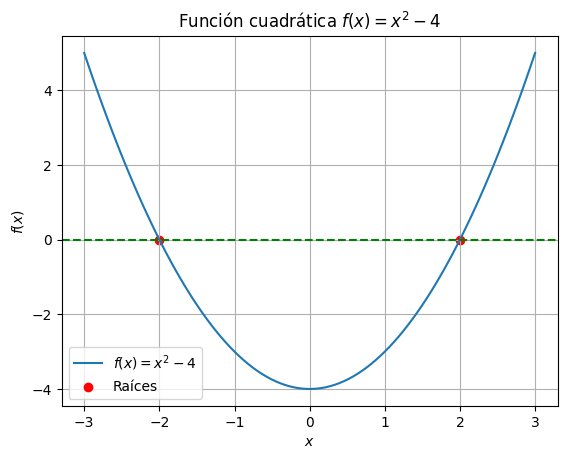

In [ ]:
f = lambda x: x**2 - 4 # Funcion implita de python
x = np.linspace(-3, 3, 100) # Puntos que usaremos para graficar
x_1, iter_1, err_1 = biseccion(f, 0, 3) # Raiz del lado derecho
x_2, iter_2, err_2 = biseccion(f, 0, -3) # Raiz del lado izquierdo

# Gráfico
plt.plot(x, f(x), label='$f(x) = x^2 - 4$')
plt.axhline(0, color='green', linestyle='--')
plt.scatter([x_1, x_2], [f(x_1), f(x_2)], color='red', label='Raíces')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Función cuadrática $f(x) = x^2 - 4$')
plt.grid(True)
plt.show()

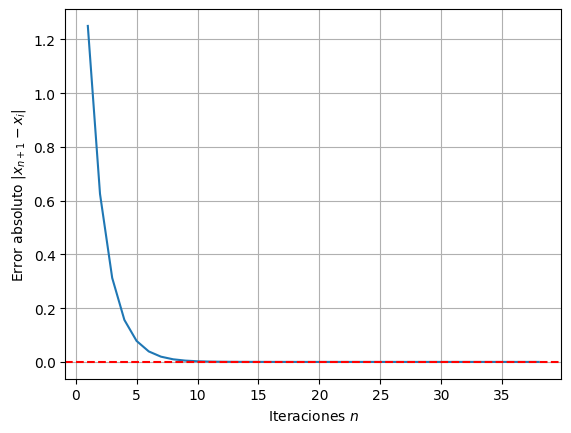

Número de iteraciones: 39
Raíz: -1.999999999998181


In [ ]:
tol = 1e-11
raiz, raices, n = biseccion(f, -5, 0, tol, 50)
error = abs(np.diff(raices))
n_ = np.arange(1, len(error)+1)

# Gráfico de iteraciones en función del error
plt.plot(n_, error)
plt.axhline(tol, color = 'red', linestyle = '--')
plt.xlabel('Iteraciones $n$')
plt.ylabel('Error absoluto $|x_{n+1} - x_i|$')
plt.grid()
plt.show()
print(f'Número de iteraciones: {n}')
print(f'Raíz: {raiz}')

### Ejemplo

$$3\sin(x) + 9 - x^2 + \cos(x) = 0$$



Las raices son -2.548230826854706 y 2.93748720549047


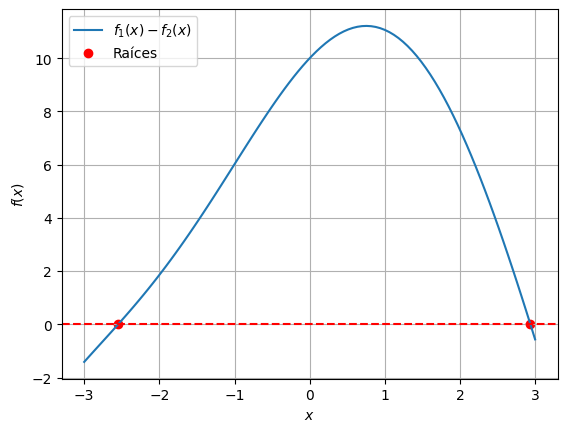

In [ ]:
fd = lambda x: 3*np.sin(x) + 9 - x**2 + np.cos(x)

x_1, _, _ = biseccion(fd, -3,-2)
x_2, _, _ = biseccion(fd, 2, 4)
plt.plot(x, fd(x), label='$f_1(x) - f_2(x)$')
plt.axhline(0, color='red', linestyle='--')
plt.scatter([x_1, x_2], [fd(x_1), fd(x_2)], color='red', label='Raíces')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
print(f'Las raices son {x_1} y {x_2}')

### Convergencia del Método de Bisección

- **Convergencia Lineal**: El método de bisección tiene una tasa de convergencia **lineal**, lo que significa que en cada iteración reduce el tamaño del intervalo que contiene la raíz a la mitad.

  Si $ I_n $ es la longitud del intervalo después de $ n $ iteraciones, entonces:
  $$
  I_{n+1} = \frac{I_n}{2}
  $$

  Esto implica que después de $ n $ iteraciones, la longitud del intervalo se puede expresar como:
  $$
  I_n = \frac{b - a}{2^n}
  $$

* **Estimación de Iteraciones**

El número de iteraciones $ n $ necesarias para que la longitud del intervalo sea menor que una tolerancia dada $\text{tol} $ se puede aproximar mediante la siguiente fórmula:
$$
n \geq \log_2\left(\frac{b - a}{\text{tol}}\right)
$$

Esto significa que aunque la convergencia del método es lineal, el uso del logaritmo permite estimar cuántas iteraciones se necesitan para alcanzar una tolerancia específica.




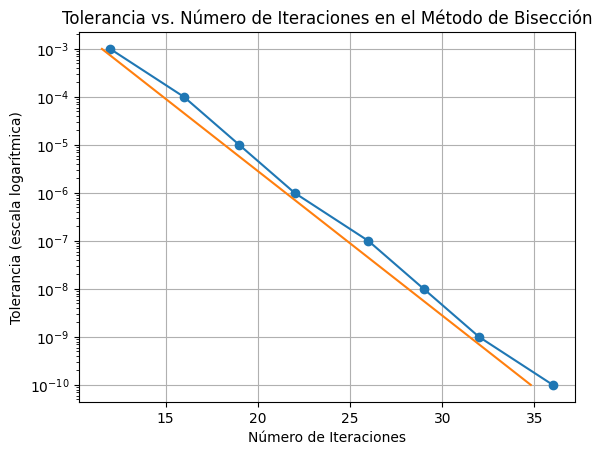

In [ ]:
# Definir la función y el intervalo
f = lambda x: x**2 - 4
a = 0
b = 3

# Lista de tolerancias a evaluar
tolerancias = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

# Listas para almacenar los resultados
num_iteraciones = []
num_iteraciones_esperadas = []
tolerancias_log = []  # Para graficar en escala logarítmica

# Iterar sobre las tolerancias
for tol in tolerancias:
  _, _, iteraciones = biseccion(f, a, b, tol=tol)
  num_iteraciones.append(iteraciones)
  tolerancias_log.append(tol)  # Agregar la tolerancia actual a la lista
  num_iteraciones_esperadas.append(np.log2((b - a)/tol))


# Crear el gráfico
plt.plot(num_iteraciones, tolerancias_log, marker='o')
plt.plot(num_iteraciones_esperadas, tolerancias_log, label='Estimación de Iteraciones')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Tolerancia (escala logarítmica)')
plt.title('Tolerancia vs. Número de Iteraciones en el Método de Bisección')
plt.yscale('log')  # Escala logarítmica en el eje y
plt.grid(True)
plt.show()

# Método de Punto Fijo para Hallar Raíces

El método de punto fijo es una técnica iterativa utilizada para encontrar raíces de ecuaciones de la forma $f(x) = 0$. Este método se basa en reformular la ecuación original en una forma que permita definir un nuevo valor de $x$ en función de otro.

![Punto fijo](https://www.researchgate.net/publication/355182751/figure/fig1/AS:1078440195301381@1634131587922/Schematic-representation-of-fixed-point-iterations-m-k-1-gm-k-It-starts-with.png)

## Pasos Punto fijo

1. **Reescritura de la ecuación**:

   * Se parte de una ecuación de la forma $f(x) = 0$.
   * Se transforma en una forma equivalente $x = g(x)$, tal que las raíces de $f(x)$ coincidan con los puntos fijos de $g(x)$.

2. **Inicialización**:

   * Se elige un valor inicial $x_0$ suficientemente cercano a la raíz esperada.
   * La elección de $x_0$ y la función $g(x)$ debe garantizar la convergencia (ver punto 4).

3. **Iteración**:

   * Se construye una sucesión iterativa con la fórmula:

     $$
     x_{n+1} = g(x_n)
     $$
   * Se evalúa $x_1 = g(x_0)$, luego $x_2 = g(x_1)$, y así sucesivamente.

4. **Condición de convergencia**:

   * Para que la sucesión $x_n$ converja a una raíz, es necesario que:

     $$
     |g'(x)| < 1 \quad \text{en un entorno de la raíz}
     $$
   * Si esta condición no se cumple, la iteración puede divergir o entrar en ciclos.

5. **Criterio de parada**:

   * Se detiene la iteración cuando se cumple alguna de las siguientes condiciones:

     * $|x_{n+1} - x_n| < \varepsilon\$ (la sucesión es estacionaria dentro de la tolerancia)
     * $|f(x_{n+1})| < \varepsilon$
     * Se alcanza un número máximo de iteraciones.



## Ejemplo

Supongamos que queremos encontrar la raíz de la ecuación:

$$
x^3 - x - 2 = 0
$$

* Reformulación

Reformulamos la ecuación en la forma $x = g(x)$:

$$
x = \sqrt[3]{x + 2}
$$

Aquí, $g(x) = \sqrt[3]{x + 2}$.

* Elección de un punto inicial

Elegimos un valor inicial $x_0 = 1$.

* Iteración

Usamos la función $g(x)$ para calcular los valores sucesivos:

1. **Primera iteración**:
   $$
   x_1 = g(x_0) = g(1) = \sqrt[3]{1 + 2} = \sqrt[3]{3} \approx 1.442
   $$

2. **Segunda iteración**:
   $$
   x_2 = g(x_1) = g(1.442) = \sqrt[3]{1.442 + 2} \approx \sqrt[3]{3.442} \approx 1.503
   $$

3. **Tercera iteración**:
   $$
   x_3 = g(x_2) = g(1.503) = \sqrt[3]{1.503 + 2} \approx \sqrt[3]{3.503} \approx 1.516
   $$

4. **Cuarta iteración**:
   $$
   x_4 = g(x_3) = g(1.516) = \sqrt[3]{1.516 + 2} \approx \sqrt[3]{3.516} \approx 1.519
   $$

* Convergencia

Continuamos este proceso hasta que la diferencia entre dos iteraciones consecutivas sea menor que una tolerancia deseada, por ejemplo, $0.001$.

Después de algunas iteraciones más, notamos que $|x_{n+1} - x_n| < 0.001$, lo que indica que hemos encontrado una solución aproximada a la raíz.




In [ ]:
#@title Función Punto Fijo
def Punto_fijo(g, x0, tol=1e-8, max_iter=100):
    """
    Encuentra la raíz de una función utilizando el método de punto fijo.

    Parámetros
    ----------
    g : function
        Función g(x) tal que x = g(x).
    x0 : float
        Valor inicial de la iteración.
    tol : float, optional
        Tolerancia para la convergencia. Por defecto es 1e-6.
    max_iter : int, optional
        Número máximo de iteraciones. Por defecto es 100.

    Devuelve
    -------
    float
        Raíz de la función.
    list
        Lista de valores de x en cada iteración.

    Lanza
    ------
    ValueError
        Si no se encuentra la raíz después de max_iter iteraciones.
    """
    xs = [x0]  # Inicializa la lista de valores de x con el valor inicial
    for n in range(1, max_iter + 1):  # Itera hasta max_iter veces
        x1 = g(x0)  # Calcula el siguiente valor de x
        xs.append(x1)  # Agrega el nuevo valor de x a la lista
        if abs(x1 - x0) < tol:  # Verifica si se ha alcanzado la convergencia
            return x1, xs  # Devuelve la raíz y la lista de valores de x
        x0 = x1  # Actualiza el valor de x para la siguiente iteración

    raise ValueError(f'No se encontró la raíz después de {max_iter} iteraciones.')  # Lanza una excepción si no se encuentra la raíz

## Ejemplo

Sea

$$x - \cos(x) = 0$$

In [ ]:
f = lambda x: np.cos(x) - x
g = lambda x: np.cos(x)
x0 = 1
raiz, raices = Punto_fijo(g, x0)
print(f'La raíz es: {raiz}')


La raíz es: 0.7390851366465718


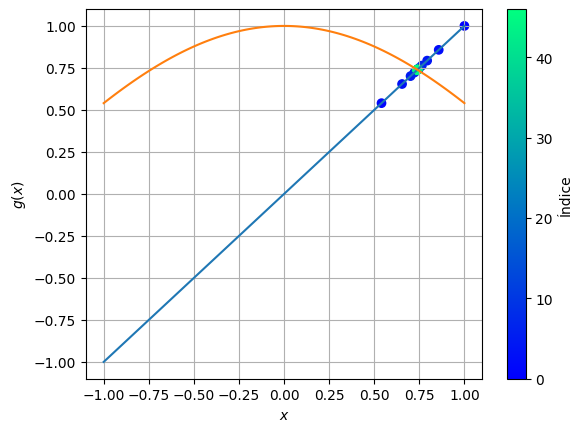

In [ ]:
x = np.linspace(-1, 1, 100) # Intervalo para la gráfica
plt.plot(x, x) # Gráfica de una recta
plt.plot(x, g(x)) # gráfica de g(x)
plt.scatter(raices, raices, c=np.arange(len(raices)), cmap='winter') # Observamos las iteraciones
plt.colorbar(label='Índice')  # Agrega una barra de colores con etiqueta
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$g(x)$')
plt.show()


## Ejemplo
Sea

$$x^2 - 5x + 3 = 0$$

Usando

$$g(x) = \sqrt{5x -3}$$

<ipython-input-38-100b5d30b704>:2: RuntimeWarning: invalid value encountered in sqrt
  g = lambda x: np.sqrt(5*x - 3)


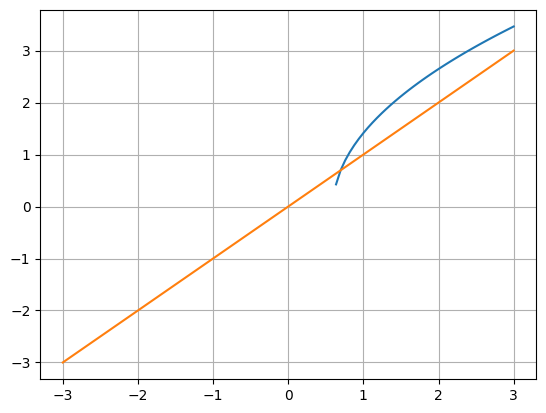

In [ ]:
f = lambda x: x**2 - 5*x + 3
g = lambda x: np.sqrt(5*x - 3)
x = np.linspace(-3, 3, 100)

plt.plot(x, g(x))
plt.plot(x, x)
plt.grid()
plt.show()

In [ ]:
x0 = 1
raiz, raices = Punto_fijo(g, x0)
print(f'La raíz es: {raiz}')

La raíz es: 0.6972243642272901


Usando

$$g(x) = \frac{x^2 + 3}{5}$$

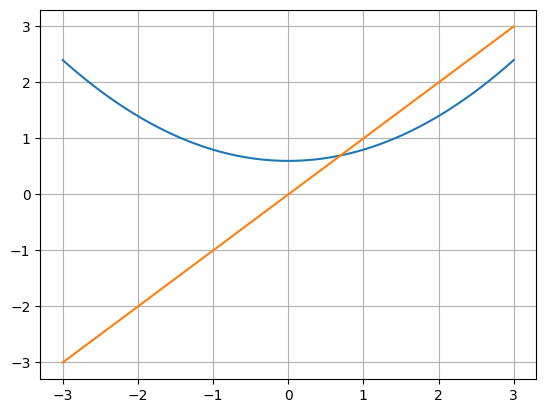

La raíz es: 0.6972243607491001


In [ ]:
f = lambda x: x**2 - 5*x + 3
g = lambda x: (x**2 + 3)/5

x = np.linspace(-3, 3, 100)

plt.plot(x, g(x))
plt.plot(x, x)
plt.grid()
plt.show()

x0 = 0
raiz, raices = Punto_fijo(g, x0)
print(f'La raíz es: {raiz}')

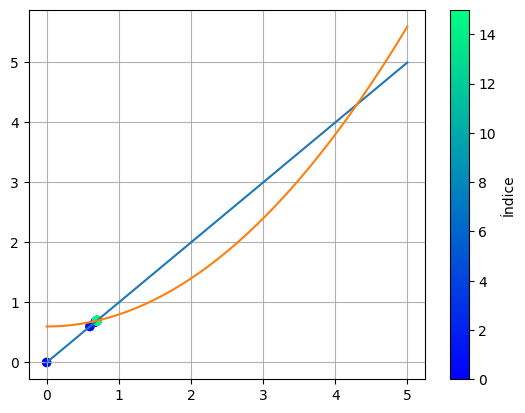

In [ ]:
x = np.linspace(0, 5, 100)
plt.plot(x, x)
plt.plot(x, g(x))
plt.scatter(raices, raices, c=np.arange(len(raices)), cmap='winter')
plt.colorbar(label='Índice')  # Agrega una barra de colores con etiqueta
plt.grid()
plt.show()

# Puntos Fijos Estables e Inestables

En el estudio de sistemas dinámicos y ecuaciones iterativas, los puntos fijos juegan un papel crucial. Un punto fijo de una función $f(x)$ es un valor $x^*$ tal que $f(x^*) = x^*$. Sin embargo, no todos los puntos fijos se comportan de la misma manera cuando consideramos el comportamiento de la función alrededor de ellos. Aquí es donde entra la distinción entre puntos fijos estables e inestables.

## Definiciones Matemáticas

Sea $g(x)$ una función diferenciable y $x^*$ un punto fijo de $g$, es decir, $g(x^*) = x^*$.

1. **Punto Fijo Estable**:
   $x^*$ es un punto fijo estable si existe un $\delta > 0$ tal que para todo $x_0$ en el intervalo $(x^* - \delta, x^* + \delta)$,
   
   $\lim_{n \to \infty} g^n(x_0) = x^*$
   
   donde $g^n$ denota la composición de $g$ consigo misma $n$ veces.

2. **Punto Fijo Inestable**:
   $x^*$ es un punto fijo inestable si existe un $\delta > 0$ tal que para todo $x_0 \neq x^*$ en el intervalo $(x^* - \delta, x^* + \delta)$,
   
   $\lim_{n \to \infty} g^n(x_0) \neq x^*$

## Criterio de Estabilidad

Para determinar la estabilidad de un punto fijo, podemos usar el siguiente criterio:

- Si $|g'(x^*)| < 1$, entonces $x^*$ es un punto fijo estable.
- Si $|g'(x^*)| > 1$, entonces $x^*$ es un punto fijo inestable.
- Si $|g'(x^*)| = 1$, la estabilidad no puede determinarse solo con esta condición y se requiere un análisis más detallado.

## Explicación Intuitiva

1. **Puntos Fijos Estables**:
   - Actúan como "atractores".
   - Si comenzamos cerca de un punto fijo estable e iteramos la función, nos acercaremos cada vez más a él.
   - Pequeñas perturbaciones alrededor del punto fijo tienden a disiparse con el tiempo.

2. **Puntos Fijos Inestables**:
   - Actúan como "repulsores".
   - Si comenzamos cerca de un punto fijo inestable e iteramos la función, nos alejaremos de él.
   - Pequeñas perturbaciones alrededor del punto fijo tienden a amplificarse con el tiempo.



